In [11]:
%matplotlib inline

In [12]:
import numpy as np
from itertools import product
from matplotlib import cm 
from pylab import plt

def julia_iteration(z, c, maxiter=256):
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z**2 + c
    return n

def julia_set(w, h, c, maxiter=256):
    m = np.empty((h, w), dtype=np.uint8)
    for j, i in product(range(h), range(w)):
        z = (i - (w/2))/(h/2) + (j - (h/2))/(h/2)*1j
        m[j, i] = julia_iteration(z, c, maxiter)
    return m

def plot_julia_set(w, h, cre, cim, cmap):
    m = julia_set(w, h, cre + cim*1j)
    colors = getattr(cm, cmap)
    plt.imshow(m, cmap = colors)
    plt.gca().axis('off')
    plt.show()

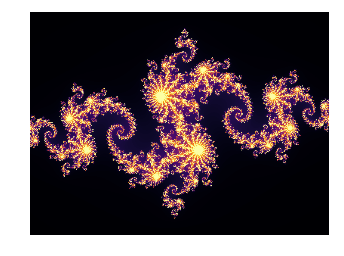

In [13]:
plot_julia_set(800, 600, -0.8, 0.156, 'inferno')   # oooh, pretty

In [14]:
#
# Citation for below, Nature: http://www.nature.com/news/ipython-interactive-demo-7.21492
#

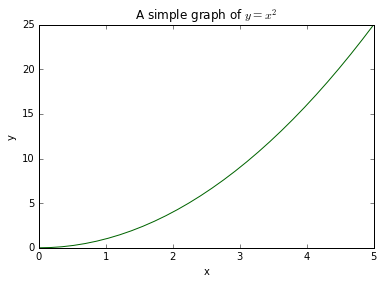

In [21]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

# Create an array of 30 values for x equally spaced from 0 to 5. 
x = np.linspace(0, 5, 30)
y = x**2

# Plot y versus x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='darkgreen')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple graph of $y=x^2$')

<function __main__.plot_sine>

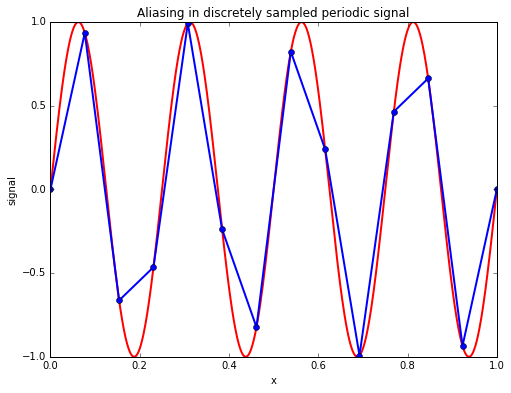

In [16]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact

def plot_sine(frequency=4.0, grid_points=12, plot_original=True):
    """
    Plot discrete samples of a sine wave on the interval ``[0, 1]``.
    """
    x = np.linspace(0, 1, grid_points + 2)
    y = np.sin(2 * frequency * np.pi * x)

    xf = np.linspace(0, 1, 1000)
    yf = np.sin(2 * frequency * np.pi * xf)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('signal')
    ax.set_title('Aliasing in discretely sampled periodic signal')

    if plot_original:
        ax.plot(xf, yf, color='red', linestyle='solid', linewidth=2)

    ax.plot(x,  y,  marker='o', linewidth=2)

# The interact function automatically builds a user interface for exploring the
# plot_sine function.
interact(plot_sine, frequency=(1.0, 22.0, 0.5), grid_points=(10, 16, 1), plot_original=True)

<function __main__.plot_blobs>

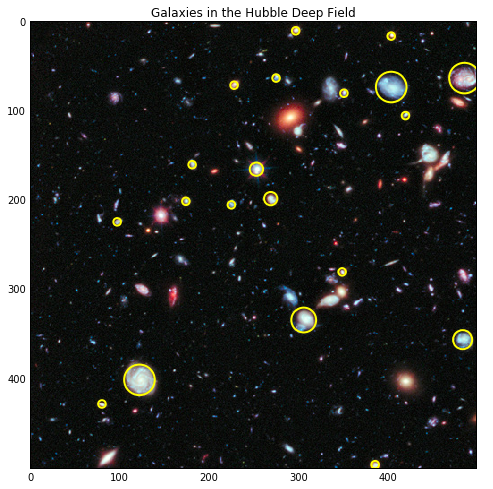

In [17]:
# Import matplotlib (plotting), skimage (image processing) and interact (user interfaces)
# This enables their use in the Notebook.
%matplotlib inline
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray

from IPython.html.widgets import interact, fixed

# Extract the first 500px square of the Hubble Deep Field.
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use 'interact' to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001))

In [18]:
#
# http://bokeh.pydata.org/en/latest/docs/gallery/texas.html
#
from bokeh.models import HoverTool
from bokeh.palettes import Viridis6
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.io import output_notebook

counties = {
    code: county for code, county in counties.items() if county["state"] == "ny"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
county_colors = [Viridis6[int(rate/3)] for rate in county_rates]

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
))

TOOLS="pan, wheel_zoom, box_zoom, reset, hover, save"


In [19]:
output_notebook()


Loading BokehJS ...

In [20]:
p = figure(title="New York Unemployment, Year 2009", tools=TOOLS,
           x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)